In [1]:
import json
from tensorflow.keras.models import load_model
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
import collections
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet50 import  preprocess_input, decode_predictions
from tensorflow.keras.models import Model

In [2]:


# Read the files word_to_idx.pkl and idx_to_word.pkl to get the mappings between word and index
word_to_index = {}
with open ("data/textFiles/word_to_idx.pkl", 'rb') as file:
    word_to_index = pd.read_pickle(file, compression=None)

index_to_word = {}
with open ("data/textFiles/idx_to_word.pkl", 'rb') as file:
    index_to_word = pd.read_pickle(file, compression=None)



print("Loading the model...")
model = load_model('model_checkpoints/model_14.h5')

modelvgg = VGG16(include_top=True,weights=None)
modelvgg.load_weights('E:/模型/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
modelvgg.layers.pop()
model_new = Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output)

Loading the model...


In [3]:
# Generate Captions for a random image
# Using Greedy Search Algorithm

def predict_caption(photo):

    inp_text = "startseq"

    #max_len = 80 which is maximum length of caption
    for i in range(80):
        sequence = [word_to_index[w] for w in inp_text.split() if w in word_to_index]
        sequence = pad_sequences([sequence], maxlen=80, padding='post')

        ypred = model.predict([photo, sequence])
        ypred = ypred.argmax()
        word = index_to_word[ypred]

        inp_text += (' ' + word)

        if word == 'endseq':
            break

    final_caption = inp_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

In [4]:
def preprocess_image (img):
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)

    # Convert 3D tensor to a 4D tendor
    img = np.expand_dims(img, axis=0)

    #Normalize image accoring to ResNet50 requirement
    img = preprocess_input(img)

    return img


In [5]:
# A wrapper function, which inputs an image and returns its encoding (feature vector)
def encode_image (img):
    img = preprocess_image(img)

    feature_vector = model_new.predict(img)
    # feature_vector = feature_vector.reshape((-1,))
    return feature_vector


In [6]:
def runModel(img_name):
    #img_name = input("enter the image name to generate:\t")

    print("Encoding the image ...")
    photo = encode_image(img_name).reshape((1, 4096))



    print("Running model to generate the caption...")
    caption = predict_caption(photo)

    img_data = plt.imread(img_name)
    plt.imshow(img_data)
    plt.axis("off")

    #plt.show()
    print(caption)
    return caption

Encoding the image ...
Running model to generate the caption...
a young boy in a blue shirt is playing with a toy toy


'a young boy in a blue shirt is playing with a toy toy'

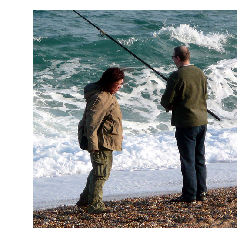

In [24]:
import cv2

runModel('D:/data/flicker/flickr30k-images/flickr30k-images/1499495021.jpg')

Encoding the image ...
Running model to generate the caption...
a young boy in a blue shirt is playing with a toy toy


'a young boy in a blue shirt is playing with a toy toy'

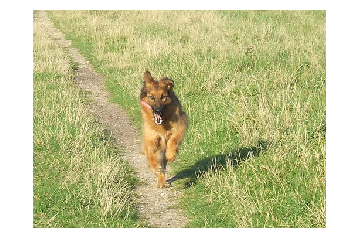

In [25]:
runModel('D:/data/flicker/Flickr8k and Flickr8kCN/Flicker8k_Dataset/240696675_7d05193aa0.jpg')